In [1]:
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold,cross_val_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn import model_selection

In [2]:
data = pd.read_csv("./selected_intersect_features.csv")

In [3]:
data

,Unnamed: 0,log-sigma-3-0-mm-3D_glszm_ZoneEntropy,wavelet-LLH_gldm_DependenceEntropy,wavelet-LLL_glszm_GrayLevelNonUniformityNormalized,wavelet-LLL_gldm_DependenceEntropy,wavelet-HHL_firstorder_Median,log-sigma-2-0-mm-3D_glcm_InverseVariance,log-sigma-2-0-mm-3D_gldm_DependenceVariance,original_glszm_GrayLevelNonUniformityNormalized,log-sigma-2-0-mm-3D_glszm_SizeZoneNonUniformityNormalized,y_all_control
0,Normal_Normal_0,-0.381019,-0.658519,0.153307,-0.661352,1.232303,-1.731997,1.346252,0.946352,1.594193,Control
1,Normal_Normal_1,-0.726474,1.451400,-1.017119,0.668282,0.876346,0.206419,-1.216239,-1.260400,1.404719,Control
2,Normal_Normal_2,-1.155733,-0.622982,0.294336,-1.435607,0.848442,-1.590146,1.212803,0.954077,1.168262,Control
3,Normal_Normal_5,-0.143137,-0.633849,1.159931,-0.624428,0.590592,-0.887741,0.891828,1.414728,0.179894,Control
4,Normal_Normal_6,0.037177,-0.357099,0.911030,-1.237197,0.633000,-0.945647,0.702849,1.011625,1.041172,Control
...,...,...,...,...,...,...,...,...,...,...,...
792,20231107CPFE_0241_31,1.463892,-0.533501,-0.949045,1.685473,-0.194403,1.429441,-0.762520,-0.250181,-3.100355,CPFE
793,20231107CPFE_0244_41,3.111933,1.026833,-1.754593,1.353285,-1.993528,1.484709,-0.628970,-2.068734,-2.351390,CPFE
794,20231107CPFE_0245_16,0.253869,1.293521,-0.682579,1.072976,-1.205438,1.321073,-1.573249,-1.107060,-1.302027,CPFE
795,20231107CPFE_0246_29,5.153169,1.385729,-2.231327,1.469841,-2.509138,1.060192,-0.755812,-1.764762,-3.079410,CPFE


In [4]:
data_x = data.iloc[:,1:-1]
data_y = data.iloc[:,-1]
data_y = np.array(data_y)
data_y[data_y=="CPFE"]=1
data_y[data_y=="Control"]=0
data_y = data_y.tolist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  data_x,data_y, random_state=6666,test_size=0.3, shuffle=True)

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
from sklearn.linear_model import LogisticRegression
parameters = {'penalty':('l1','l2','elasticnet','none'),
              'C':[0.001,0.01,0.1,1,10,100],
               'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
              #'multi_class':('auto','ovr','multinominal'),
              'max_iter':[100000]
             }  
clf= LogisticRegression()
clf = GridSearchCV(clf, parameters,scoring='accuracy', cv=5)
clf.fit(X_train, y_train)
print(type(clf.best_params_))
print(clf.best_params_)

model_LogisticRegression = clf.best_estimator_
model_LogisticRegression.fit(X_train, y_train)

y_pred = model_LogisticRegression.predict(X_test)
print('预测正确的个数：%d,预测错误的个数：%d' %((y_test==y_pred).sum(),(y_test!=y_pred).sum()))
ans = classification_report(y_test,y_pred,digits=5)
print(ans)

<class 'dict'>
{'C': 10, 'max_iter': 100000, 'penalty': 'l2', 'solver': 'newton-cg'}
预测正确的个数：225,预测错误的个数：15
              precision    recall  f1-score   support

           0    0.93810   0.98995   0.96333       199
           1    0.93333   0.68293   0.78873        41

    accuracy                        0.93750       240
   macro avg    0.93571   0.83644   0.87603       240
weighted avg    0.93728   0.93750   0.93350       240



In [8]:
from sklearn.svm import SVC
parameters = {'kernel': ('linear', 'rbf', 'poly','sigmoid'), 
              'C': [0.001,0.01,0.1,1,10,100], 
              'degree':[1,2,3,4],
              'gamma':('scale', 'auto'),
              'decision_function_shape':('ovo','ovr')
             }  
clf= SVC()
clf = GridSearchCV(clf, parameters,scoring='accuracy', cv=5)
clf.fit(X_train, y_train)
print(type(clf.best_params_))
print(clf.best_params_)

model_SVC = clf.best_estimator_

model_SVC.fit(X_train, y_train)
y_pred = model_SVC.predict(X_test) # 预测样本
print('预测正确的个数：%d,预测错误的个数：%d' %((y_test==y_pred).sum(),(y_test!=y_pred).sum()))
ans = classification_report(y_test,y_pred,digits=5)
print(ans)

<class 'dict'>
{'C': 1, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}
预测正确的个数：223,预测错误的个数：17
              precision    recall  f1-score   support

           0    0.92925   0.98995   0.95864       199
           1    0.92857   0.63415   0.75362        41

    accuracy                        0.92917       240
   macro avg    0.92891   0.81205   0.85613       240
weighted avg    0.92913   0.92917   0.92361       240



In [21]:
features

['log-sigma-3-0-mm-3D_glszm_ZoneEntropy',
 'wavelet-LLH_gldm_DependenceEntropy',
 'wavelet-LLL_glszm_GrayLevelNonUniformityNormalized',
 'wavelet-LLL_gldm_DependenceEntropy',
 'wavelet-HHL_firstorder_Median',
 'log-sigma-2-0-mm-3D_glcm_InverseVariance',
 'log-sigma-2-0-mm-3D_gldm_DependenceVariance',
 'original_glszm_GrayLevelNonUniformityNormalized',
 'log-sigma-2-0-mm-3D_glszm_SizeZoneNonUniformityNormalized']

Feature importance: [ 0.543126    1.0209165  -0.92676988 -0.77974362 -0.49377376  0.94040377
  0.97310578  0.55665146 -0.15252919]


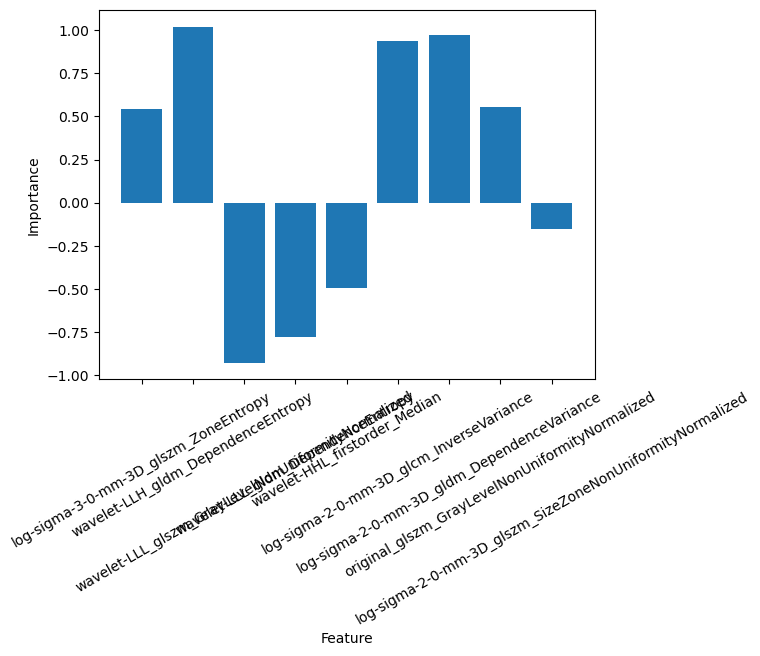

In [11]:
coef = model_SVC.coef_[0]
print('Feature importance:', coef)
features = list(X_test.columns)
# 可视化特征重要性
plt.bar(range(len(coef)), coef)
plt.xticks(range(len(coef)), features, rotation='30')
plt.xlabel('Feature')
plt.ylabel('Importance')
# plt.show()
plt.savefig('feature_importance.pdf', bbox_inches='tight')

In [26]:
[features[i] for i in indices]

['log-sigma-3-0-mm-3D_glszm_ZoneEntropy',
 'log-sigma-2-0-mm-3D_glcm_InverseVariance',
 'wavelet-LLH_gldm_DependenceEntropy',
 'log-sigma-2-0-mm-3D_gldm_DependenceVariance',
 'wavelet-HHL_firstorder_Median',
 'log-sigma-2-0-mm-3D_glszm_SizeZoneNonUniformityNormalized',
 'wavelet-LLL_gldm_DependenceEntropy',
 'original_glszm_GrayLevelNonUniformityNormalized',
 'wavelet-LLL_glszm_GrayLevelNonUniformityNormalized']

In [28]:
features

['log-sigma-3-0-mm-3D_glszm_ZoneEntropy',
 'wavelet-LLH_gldm_DependenceEntropy',
 'wavelet-LLL_glszm_GrayLevelNonUniformityNormalized',
 'wavelet-LLL_gldm_DependenceEntropy',
 'wavelet-HHL_firstorder_Median',
 'log-sigma-2-0-mm-3D_glcm_InverseVariance',
 'log-sigma-2-0-mm-3D_gldm_DependenceVariance',
 'original_glszm_GrayLevelNonUniformityNormalized',
 'log-sigma-2-0-mm-3D_glszm_SizeZoneNonUniformityNormalized']

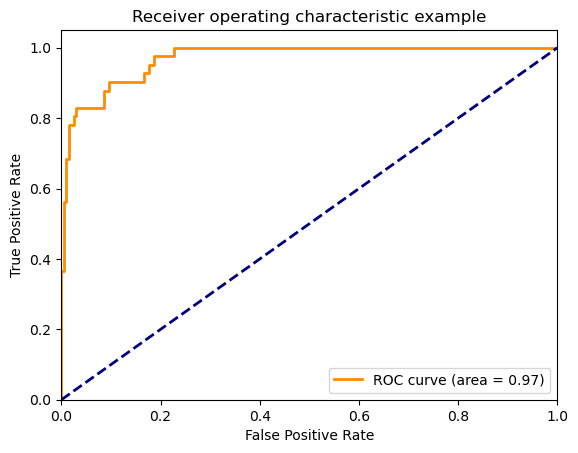

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score as AUC
import matplotlib.pyplot as plt
import numpy as np

y_scores = model_SVC.decision_function(X_test)
FPR, recall, thresholds = roc_curve(y_test, y_scores, pos_label=1)
# 计算AUC面积
area = AUC(y_test, y_scores)
# 画图
plt.figure()
lw = 2
plt.plot(FPR, recall, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
# plt.show()
plt.savefig("ROC-curve of lung tissue classification_3.pdf")

In [12]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators': [10,30,50,70,90,100],
              'max_features':('sqrt','log2','auto'),
              'ccp_alpha':[0,2,4,6,8],
              'criterion':('gini','entropy','log_loss'),
             } 
clf = RandomForestClassifier()
clf = GridSearchCV(clf,parameters,scoring='accuracy', cv=5)
clf.fit(X_train, y_train)

print(clf.best_params_)
model_RandomForestClassifier = clf.best_estimator_
model_RandomForestClassifier.fit(X_train, y_train)  # 训练模型
y_pred = model_RandomForestClassifier.predict(X_test) # 预测样本
print('预测正确的个数：%d,预测错误的个数：%d' %((y_test==y_pred).sum(),(y_test!=y_pred).sum()))
ans = classification_report(y_test,y_pred,digits=5)
print(ans)

{'ccp_alpha': 0, 'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 90}
预测正确的个数：219,预测错误的个数：21
              precision    recall  f1-score   support

           0    0.91204   0.98995   0.94940       199
           1    0.91667   0.53659   0.67692        41

    accuracy                        0.91250       240
   macro avg    0.91435   0.76327   0.81316       240
weighted avg    0.91283   0.91250   0.90285       240



In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

model_list = []
DesicionTree_model = DecisionTreeClassifier()
SVC_model = SVC()
MLP_model = MLPClassifier()
KNN_model = KNeighborsClassifier()
model_list.append(DesicionTree_model)
model_list.append(SVC_model)
model_list.append(MLP_model)
model_list.append(KNN_model)

In [14]:
from xgboost.sklearn import XGBClassifier

parameters = {'base_estimator': model_list,
              'algorithm': ('SAMME', 'SAMME.R'),
              'n_estimators': [10,30,50,70,90],
              'learning_rate':[1.0,1.5],
             } 
clf = XGBClassifier()
clf = GridSearchCV(clf,parameters,scoring='accuracy', cv=5)
clf.fit(X_train, y_train)

print(clf.best_params_)
model_xgboost = clf.best_estimator_
model_xgboost.fit(X_train, y_train)  # 训练模型
y_pred = model_xgboost.predict(X_test) # 预测样本
print('预测正确的个数：%d,预测错误的个数：%d' %((y_test==y_pred).sum(),(y_test!=y_pred).sum()))
ans = classification_report(y_test,y_pred,digits=5)
print(ans)

[17:20:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "algorithm", "base_estimator" } are not used.

[17:20:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "algorithm", "base_estimator" } are not used.

[17:20:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "algorithm", "base_estimator" } are not used.

[17:20:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "algorithm", "base_estimator" } are not used.

[17:20:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windo

(-1.0, 9.0)

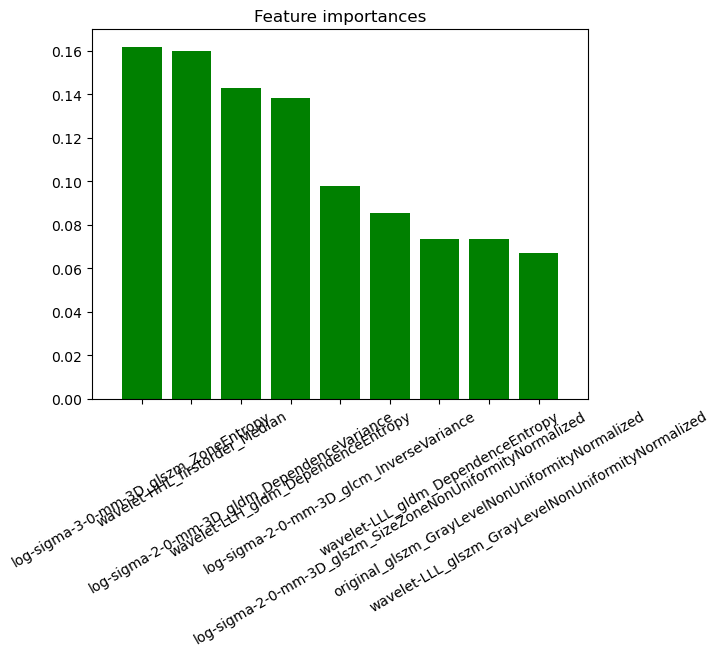

In [15]:
features = list(X_test.columns)
importances = model_RandomForestClassifier.feature_importances_

indices = np.argsort(importances)[::-1]
num_features = len(importances)
 
#将特征重要度以柱状图展示
plt.figure()
plt.title("Feature importances")
plt.bar(range(num_features), importances[indices], color="g", align="center")
plt.xticks(range(num_features), [features[i] for i in indices], rotation='30')
plt.xlim([-1, num_features])

In [20]:
X_train

,log-sigma-3-0-mm-3D_glszm_ZoneEntropy,wavelet-LLH_gldm_DependenceEntropy,wavelet-LLL_glszm_GrayLevelNonUniformityNormalized,wavelet-LLL_gldm_DependenceEntropy,wavelet-HHL_firstorder_Median,log-sigma-2-0-mm-3D_glcm_InverseVariance,log-sigma-2-0-mm-3D_gldm_DependenceVariance,original_glszm_GrayLevelNonUniformityNormalized,log-sigma-2-0-mm-3D_glszm_SizeZoneNonUniformityNormalized
32,0.464163,-0.855646,0.965510,-1.419696,-0.610928,-0.511379,0.206012,0.651318,0.719109
752,0.148930,-0.913813,1.312492,-0.989001,0.023574,0.421317,0.083533,1.032571,-0.388400
459,-0.297302,0.445518,0.534343,-0.147274,-0.143066,0.659518,-0.363300,-0.709956,-0.270462
212,-0.154871,0.222080,0.105478,-0.152621,0.743100,-0.944614,0.636015,0.008508,1.041881
414,0.977625,-0.941528,1.052751,-0.660584,-0.588651,0.313522,0.076200,0.454101,-0.149392
...,...,...,...,...,...,...,...,...,...
382,0.643172,-0.007867,-0.321302,1.150376,-0.013720,0.719066,-0.358676,-0.572350,-0.971774
102,-0.120692,-1.863611,-0.907589,0.733630,0.829582,-0.705669,1.120972,-0.595570,-1.491895
665,0.718982,0.681116,-1.764118,1.938850,-0.055732,1.432413,-0.867622,-2.037615,-0.775107
95,-0.889070,-1.327699,1.314623,-1.493043,0.202876,-0.899662,0.886391,1.747471,0.436544


In [15]:
rad_score = model_SVC.decision_function(data_x)
rad_score_train = model_SVC.decision_function(X_train)
rad_score_test = model_SVC.decision_function(X_test)

In [16]:
data_new = data.join(pd.DataFrame({"rad_score": rad_score}))
train_data_new = data.iloc[list(X_train.index),:].join(pd.DataFrame({"rad_score": rad_score_train}, index=list(X_train.index)))
test_data_new = data.iloc[list(X_test.index),:].join(pd.DataFrame({"rad_score": rad_score_test}, index=list(X_test.index)))
data_new.to_csv("./data_with_radscore.csv")
train_data_new.to_csv("./data_with_radscore_train.csv")
test_data_new.to_csv("./data_with_radscore_test.csv")

In [17]:
result_svc = model_SVC.decision_function(X_test)
result_lr = model_LogisticRegression.decision_function(X_test)
result_rf = model_RandomForestClassifier.predict_proba(X_test)[:,1]
result_xgboost = model_xgboost.predict_proba(X_test)[:,1]

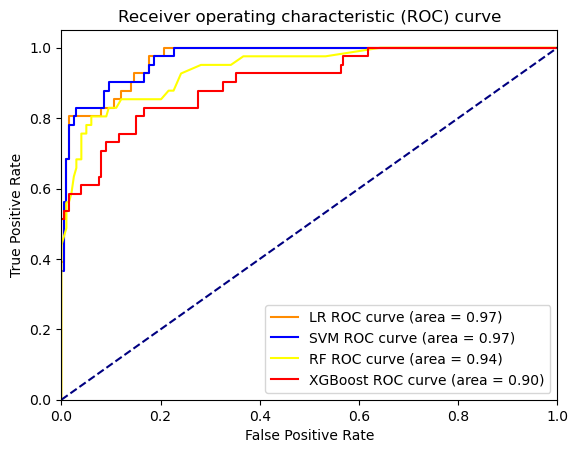

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr1, tpr1, thresholds1 = roc_curve(y_test, result_lr)
roc_auc1 = roc_auc_score(y_test, result_lr)

fpr2, tpr2, thresholds2 = roc_curve(y_test, result_svc)
roc_auc2 = roc_auc_score(y_test, result_svc)

fpr3, tpr3, thresholds3 = roc_curve(y_test, result_rf)
roc_auc3 = roc_auc_score(y_test, result_rf)

fpr4, tpr4, thresholds4 = roc_curve(y_test, result_xgboost)
roc_auc4 = roc_auc_score(y_test, result_xgboost)

# 绘制ROC曲线
plt.plot(fpr1, tpr1, color='darkorange', label='LR ROC curve (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='blue', label='SVM ROC curve (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='yellow', label='RF ROC curve (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='red', label='XGBoost ROC curve (area = %0.2f)' % roc_auc4)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")

plt.savefig('roc.pdf', bbox_inches='tight')

,Unnamed: 0,log-sigma-3-0-mm-3D_glszm_ZoneEntropy,wavelet-LLH_gldm_DependenceEntropy,wavelet-LLL_glszm_GrayLevelNonUniformityNormalized,wavelet-LLL_gldm_DependenceEntropy,wavelet-HHL_firstorder_Median,log-sigma-2-0-mm-3D_glcm_InverseVariance,log-sigma-2-0-mm-3D_gldm_DependenceVariance,original_glszm_GrayLevelNonUniformityNormalized,log-sigma-2-0-mm-3D_glszm_SizeZoneNonUniformityNormalized,y_all_control
32,20231023Normal_0149_89,0.464163,-0.855646,0.965510,-1.419696,-0.610928,-0.511379,0.206012,0.651318,0.719109,Control
752,20231023CPFE_0121_28,0.148930,-0.913813,1.312492,-0.989001,0.023574,0.421317,0.083533,1.032571,-0.388400,CPFE
459,20231107COPD_0300_47,-0.297302,0.445518,0.534343,-0.147274,-0.143066,0.659518,-0.363300,-0.709956,-0.270462,Control
212,20231107Normal_0458_107,-0.154871,0.222080,0.105478,-0.152621,0.743100,-0.944614,0.636015,0.008508,1.041881,Control
414,20231023COPD_0211_66,0.977625,-0.941528,1.052751,-0.660584,-0.588651,0.313522,0.076200,0.454101,-0.149392,Control
...,...,...,...,...,...,...,...,...,...,...,...
382,COPD_COPD_34,0.643172,-0.007867,-0.321302,1.150376,-0.013720,0.719066,-0.358676,-0.572350,-0.971774,Control
102,20231023Normal_0230_46,-0.120692,-1.863611,-0.907589,0.733630,0.829582,-0.705669,1.120972,-0.595570,-1.491895,Control
665,20231124COPD_0608_129,0.718982,0.681116,-1.764118,1.938850,-0.055732,1.432413,-0.867622,-2.037615,-0.775107,Control
95,20231023Normal_0225_103,-0.889070,-1.327699,1.314623,-1.493043,0.202876,-0.899662,0.886391,1.747471,0.436544,Control
